# Loading the required lib


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import sys
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import re

pd.set_option('display.max_colwidth', None)

# Loading data from drive

In [3]:
folder_path = '/content/drive/Shareddrives/ml/cleaned_dataset'


In [4]:
meta_data = pd.read_csv(os.path.join(folder_path, "metadata.csv"))
meta_data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. 35.093],4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. 45.968],24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. 40.671],4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2.0000e+00 5.6984e+01],4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. 45.046],24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. 36.328],4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. 17.687],4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


# Finding outlier in the dataset


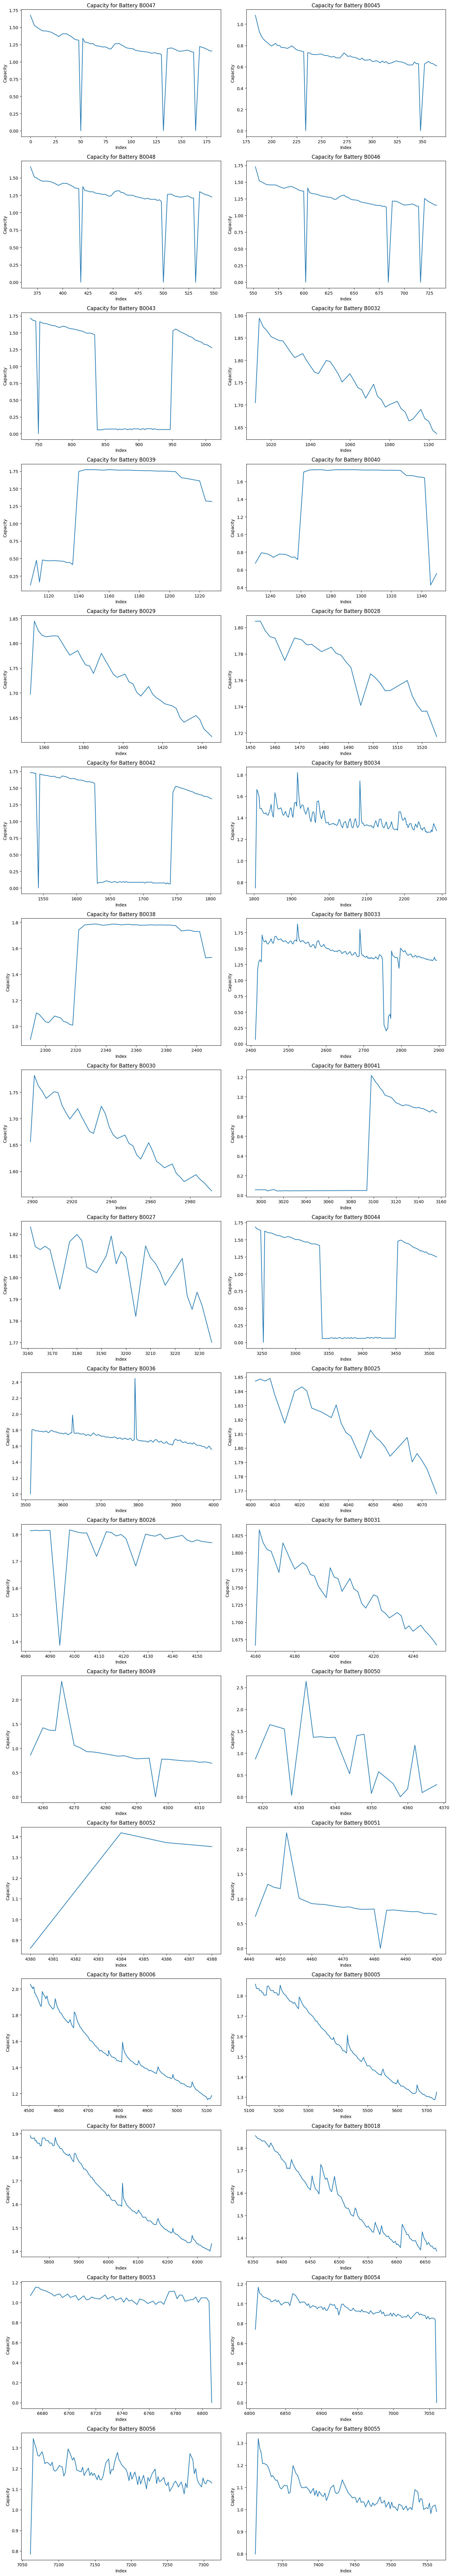

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Capacity' is numeric, convert it to numeric type
meta_data['Capacity'] = pd.to_numeric(meta_data['Capacity'], errors='coerce')

# Get unique battery IDs
unique_batteries = meta_data['battery_id'].unique()

# Determine the number of rows and columns for subplots
num_rows = (len(unique_batteries) + 1) // 2  # Adjust as needed
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plotting
for i, battery_id in enumerate(unique_batteries):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Filter data for the current battery
    battery_data = meta_data[meta_data['battery_id'] == battery_id]

    # Using seaborn's lineplot
    sns.lineplot(data=battery_data, x=battery_data.index, y='Capacity', ax=ax)

    ax.set_title(f'Capacity for Battery {battery_id}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Capacity')

plt.tight_layout()
plt.show()


# Finding outlier in the dataset using BOX Plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Capacity' is numeric, convert it to numeric type
meta_data['Capacity'] = pd.to_numeric(meta_data['Capacity'], errors='coerce')

# Get unique battery IDs
unique_batteries = meta_data['battery_id'].unique()

# Determine the number of rows and columns for subplots
num_rows = (len(unique_batteries) + 1) // 2  # Adjust as needed
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plotting
for i, battery_id in enumerate(unique_batteries):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Filter data for the current battery
    battery_data = meta_data[meta_data['battery_id'] == battery_id]

    # Using seaborn's boxplot
    sns.boxplot(data=battery_data, y='Capacity', ax=ax)

    ax.set_title(f'Capacity for Battery {battery_id}')
    ax.set_xlabel('Battery')
    ax.set_ylabel('Capacity')

plt.tight_layout()
plt.show()

# Removing the batteries which have incorrect data

In [ ]:
batteries_to_remove = ['B0043', 'B0040', 'B0042', 'B0044', 'B0039', 'B0034', 'B0038', 'B0033', 'B0041', 'B0052']

# Filter out rows with battery IDs to remove
filtered_df = meta_data[~meta_data['battery_id'].isin(batteries_to_remove)]

# Print the filtered DataFrame
filtered_df

# After removing the batteries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Capacity' is numeric, convert it to numeric type
filtered_df['Capacity'] = pd.to_numeric(filtered_df['Capacity'], errors='coerce')

# Get unique battery IDs
unique_batteries = filtered_df['battery_id'].unique()

# Create an empty DataFrame to store non-outliers
filtered_data = pd.DataFrame()

# Iterate over each battery
for battery_id in unique_batteries:
    # Filter data for the current battery
    battery_data = filtered_df[filtered_df['battery_id'] == battery_id]

    # Calculate the lower and upper quartiles
    Q1 = battery_data['Capacity'].quantile(0.25)
    Q3 = battery_data['Capacity'].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    non_outliers = battery_data[(battery_data['Capacity'] >= lower_bound) & (battery_data['Capacity'] <= upper_bound)]

    # Append non-outliers to the filtered DataFrame
    filtered_data = pd.concat([filtered_data, non_outliers])

# Plotting
sns.boxplot(data=filtered_data, x='battery_id', y='Capacity')
plt.title('Capacity for Batteries (without outliers)')
plt.xlabel('Battery')
plt.ylabel('Capacity')
plt.show()

# Filtering out the discharge data

In [ ]:
discharge_data = filtered_df[filtered_df['type'] == 'discharge']

In [ ]:
discharge_data

In [ ]:
import pandas as pd
import numpy as np

# Custom parsing function to convert the array-like string to datetime
def custom_parser(x):
    # Split the string and extract components
    components = x.strip('[]').split()
    year = int(float(components[0]))
    month = int(float(components[1]))
    day = int(float(components[2]))
    hour = int(float(components[3]))
    minute = int(float(components[4]))
    second = float(components[5])
    microsecond = int((second - int(second)) * 1e6)  # Extract microseconds from the fractional part of seconds
    second = int(second)  # Extract seconds without the fractional part
    # Create and return the Timestamp object
    return pd.Timestamp(year, month, day, hour, minute, second, microsecond)

# Function to clean mixed datetime formats
def clean_datetime(x):
    try:
        return pd.to_datetime(x)
    except ValueError:
        return custom_parser(x)

# Assuming 'start_time' is the column in filtered_df
discharge_data['start_time'] = discharge_data['start_time'].apply(clean_datetime)

# Print the DataFrame to verify the changes
discharge_data

In [ ]:
discharge_data['start_time_unix'] = discharge_data['start_time'].astype(int) // 10**9
discharge_data

In [ ]:
from matplotlib import pyplot as plt
discharge_data['Capacity'].plot(kind='line', figsize=(8, 4), title='Capacity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['start_time_unix']
  ys = series['Capacity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = discharge_data.sort_values('start_time_unix', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('start_time_unix')
_ = plt.ylabel('Capacity')

In [ ]:
# Selecting columns of integer or float data types
numeric_columns = discharge_data.select_dtypes(include=['int64', 'float64'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# Regularization

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load your dataset
#df = pd.read_csv('final_output.csv')

# Selecting features and the target variable
X = final_dataframe.drop(columns=['type', 'start_time', 'battery_id', 'filename', 'SoH', 'Re', 'Rct', 'Capacity'])
y = final_dataframe['SoH'].dropna()  # Dropping missing values from the target

# Make sure to remove rows with NaN in the target from X as well
X = X.loc[y.index]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model with an alpha value that adds regularization
# You might need to adjust alpha based on your dataset specifics and desired level of regularization
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, examining the coefficients
print("Model coefficients:", lasso.coef_)

# Lazy Predict

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state = 42)
X_train.info()

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

In [ ]:
# Calculating Mean Squared Error
r2 = r2_score(y_test, y_pred)
print("r2", r2)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mean_absolute_error)
max_error = max_error(y_test, y_pred)
print("max_error:", max_error)
explained_variance_score = explained_variance_score(y_test, y_pred)
print("explained_variance_score", explained_variance_score)
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error", mean_absolute_percentage_error)